In [183]:
import pandas as pd

In [184]:
df_airlines_ind=pd.read_csv('/Users/surya/Desktop/indian_airlines_prices.csv')
df_oil=pd.read_csv('/Users/surya/Desktop/OilPrices_Cleaned.csv')

In [185]:
df_airlines_ind

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,year_quarter
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,10527.0,2013-Q1
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,10585.0,2013-Q2
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,10882.0,2013-Q3
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,10591.0,2013-Q4
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,10664.0,2014-Q1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
300148,300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,8183.0,2019-Q1
300149,300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,8567.0,2019-Q2
300150,300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,8383.0,2019-Q3
300151,300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,8413.0,2019-Q4


In [186]:
dollar_rate = 70.68  # Exchange rate
df_airlines_ind['Price_USD'] = df_airlines_ind['price'] / dollar_rate


In [187]:
df_airlines_ind.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  float64
 12  year_quarter      300153 non-null  object 
 13  Price_USD         300153 non-null  float64
dtypes: float64(3), int64(2), object(9)
memory usage: 32.1+ MB


In [188]:
df_airlines_ind = df_airlines_ind.drop(['days_left', 'Unnamed: 0'], axis=1)

In [189]:
df_airlines_ind.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
300148     True
300149     True
300150    False
300151    False
300152    False
Length: 300153, dtype: bool

In [190]:
df_airlines_ind=df_airlines_ind.drop_duplicates()

In [191]:
def detect_outliers(df, column_name):
    q1 = df[column_name].quantile(0.25)
    q3 = df[column_name].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)
    outliers = df[(df[column_name] < lower_bound) | (df[column_name] > upper_bound)]
    return outliers

In [192]:
outliers = detect_outliers(df_airlines_ind, 'Price_USD')
outliers

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,price,year_quarter,Price_USD
28,SpiceJet,SG-8169,Delhi,Evening,zero,Night,Mumbai,Economy,2.33,4987.0,2020-Q1,70.557442
32,Vistara,UK-813,Delhi,Evening,one,Morning,Mumbai,Economy,14.67,6015.0,2021-Q1,85.101868
35,Vistara,UK-801,Delhi,Morning,one,Morning,Mumbai,Economy,23.17,13945.0,2021-Q4,197.297680
42,Air_India,AI-506,Delhi,Morning,one,Morning,Mumbai,Economy,22.83,5523.0,2023-Q3,78.140917
43,Air_India,AI-803,Delhi,Early_Morning,one,Morning,Mumbai,Economy,26.42,5523.0,2023-Q4,78.140917
...,...,...,...,...,...,...,...,...,...,...,...,...
300071,Air_India,AI-672,Chennai,Afternoon,one,Night,Hyderabad,Business,5.83,13945.0,2021-Q4,197.297680
300078,Vistara,UK-828,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.92,18665.0,2023-Q3,264.077533
300079,Vistara,UK-824,Chennai,Night,one,Afternoon,Hyderabad,Business,15.75,18665.0,2023-Q4,264.077533
300108,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,4987.0,2020-Q1,70.557442


In [193]:
# Detecting outliers using the Interquartile Range (IQR) method
Q1 = df_airlines_ind['Price_USD'].quantile(0.25)
Q3 = df_airlines_ind['Price_USD'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identifying the outliers
outliers = df_airlines_ind[(df_airlines_ind['Price_USD'] < lower_bound) | (df_airlines_ind['Price_USD'] > upper_bound)]
# Creating a subset without outliers
subset_no_outliers = df_airlines_ind[(df_airlines_ind['Price_USD'] >= lower_bound) & (df_airlines_ind['Price_USD'] <= upper_bound)]

# Returning a summary of the outliers and the subset without outliers
outliers_info = outliers.describe()
subset_info = subset_no_outliers.describe()

(outliers_info, subset_info)

(           duration         price     Price_USD
 count  25464.000000  25464.000000  25464.000000
 mean      12.370408   8506.278707    120.349161
 std        7.239165   7346.479669    103.940007
 min        0.830000    502.000000      7.102434
 25%        6.920000   3696.500000     52.299095
 50%       11.330000   6015.000000     85.101868
 75%       16.330000  13945.000000    197.297680
 max       44.500000  46658.000000    660.130164,
             duration          price      Price_USD
 count  188105.000000  188105.000000  188105.000000
 mean       12.447108   10351.061099     146.449648
 std         7.311184     948.596938      13.421009
 min         0.830000    7116.000000     100.679117
 25%         6.920000   10314.000000     145.925297
 50%        11.330000   10505.000000     148.627617
 75%        16.500000   10994.000000     155.546123
 max        49.830000   13279.000000     187.874929)

In [194]:
subset_no_outliers

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,price,year_quarter,Price_USD
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,10527.0,2013-Q1,148.938879
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,10585.0,2013-Q2,149.759479
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,10882.0,2013-Q3,153.961517
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,10591.0,2013-Q4,149.844369
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,10664.0,2014-Q1,150.877193
...,...,...,...,...,...,...,...,...,...,...,...,...
300138,Vistara,UK-832,Chennai,Early_Morning,one,Morning,Hyderabad,Business,26.33,10485.0,2016-Q3,148.344652
300139,Vistara,UK-834,Chennai,Evening,one,Evening,Hyderabad,Business,26.42,10354.0,2016-Q4,146.491228
300147,Air_India,AI-569,Chennai,Early_Morning,one,Night,Hyderabad,Business,17.25,10497.0,2018-Q4,148.514431
300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,8383.0,2019-Q3,118.604980


In [195]:
merged_df_no_outliers = pd.merge(subset_no_outliers, df_oil, on='year_quarter')

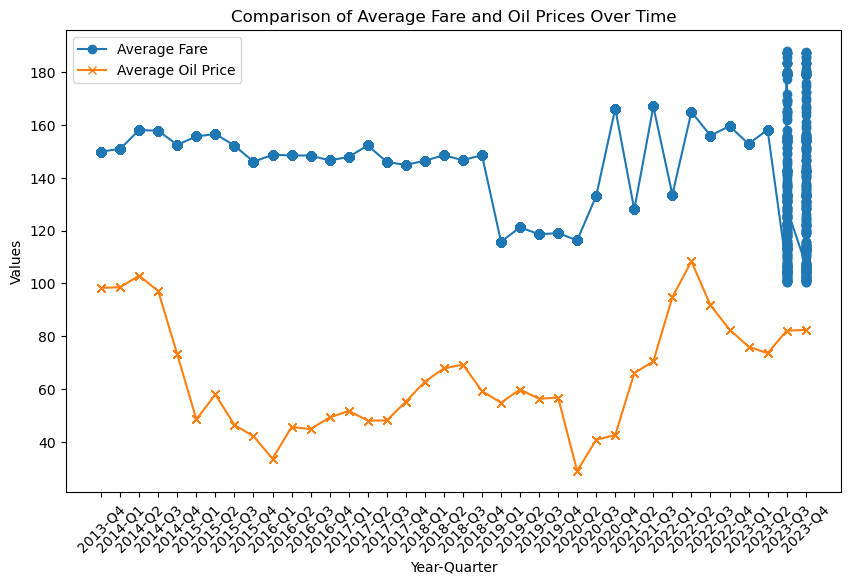

In [196]:
import matplotlib.pyplot as plt
# Create a plot
plt.figure(figsize=(10, 6))

# Plotting fare from airlines dataset
plt.plot(merged_df_no_outliers['year_quarter'], merged_df_no_outliers['Price_USD'], label='Average Fare', marker='o')

# Plotting average price from oil dataset
plt.plot(merged_df_no_outliers['year_quarter'], merged_df_no_outliers['average_price'], label='Average Oil Price', marker='x')

# Adding labels and title
plt.xlabel('Year-Quarter')
plt.ylabel('Values')
plt.title('Comparison of Average Fare and Oil Prices Over Time')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend()

# Show the plot
plt.show()

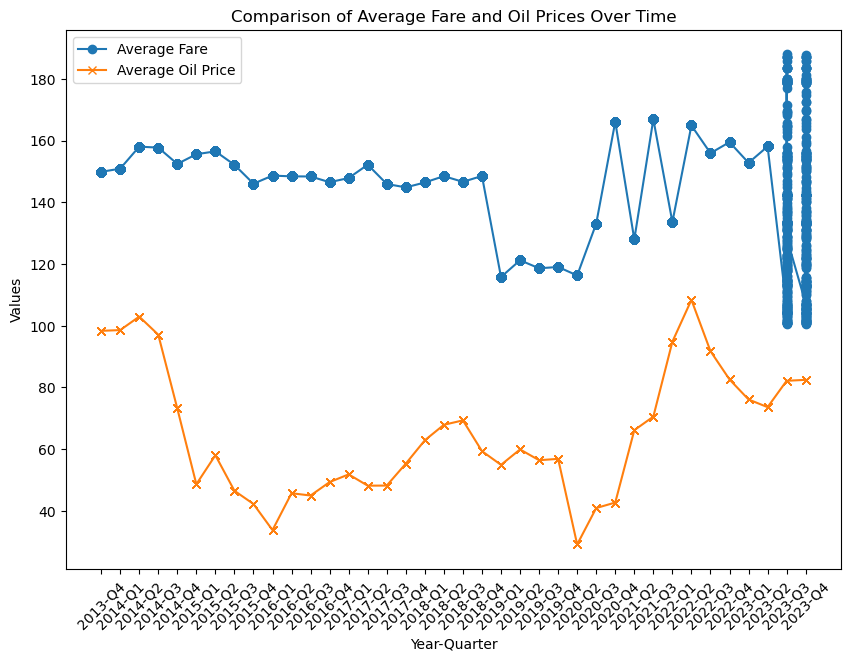

In [197]:
import matplotlib.pyplot as plt
# Create a plot
plt.figure(figsize=(10, 7))

# Plotting fare from airlines dataset
plt.plot(merged_df_no_outliers['year_quarter'], merged_df_no_outliers['Price_USD'], label='Average Fare', marker='o')

# Plotting average price from oil dataset
plt.plot(merged_df_no_outliers['year_quarter'], merged_df_no_outliers['average_price'], label='Average Oil Price', marker='x')

# Adding labels and title
plt.xlabel('Year-Quarter')
plt.ylabel('Values')
plt.title('Comparison of Average Fare and Oil Prices Over Time')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend()

# Show the plot
plt.show()

In [198]:
# Splitting X and y from data 
X = merged_df_no_outliers.drop('Price_USD',axis = 1)

y = merged_df_no_outliers['Price_USD'].astype('float32')

In [199]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [200]:
# Select relevant columns
X = merged_df_no_outliers[['average_price']]  # Independent variable
y = merged_df_no_outliers['Price_USD']        # Dependent variable

In [201]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [202]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [203]:
# Predicting the fares
y_pred = model.predict(X_test)

# Calculating metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)


Mean Squared Error: 170.6770972438739
R-squared: 0.11613136825685577


In [204]:
coef = model.coef_
intercept = model.intercept_

print("Coefficient:", coef)
print("Intercept:", intercept)


Coefficient: [0.23026083]
Intercept: 131.31689896648416
